In [1]:
#Importing libraries and data and renaming columns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
#file_location

file_location = r'D:\data Immersion\Preparing and Analzing Data\Raw\Advanced Analytics & Dashboard Design(Achievement 6)\Final report'

In [6]:
# Importing housing data

df = pd.read_csv(os.path.join(file_location, '02 Data', 'ready Data', 'US_AQI_clean_2.csv'))

In [7]:
df.shape

(1048575, 16)

In [8]:
df.head()

,Unnamed: 0.1,Unnamed: 0,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_name,latitude,longitude,population,density,timezone,density_flag
0,0,0,10140,01/01/2022,21,Good,PM2.5,2,Aberdeen,Washington,46.9757,-123.8094,16571,588,America/Los_Angeles,Middle density
1,1,1,10140,02/01/2022,12,Good,PM2.5,2,Aberdeen,Washington,46.9757,-123.8094,16571,588,America/Los_Angeles,Middle density
2,2,2,10140,03/01/2022,18,Good,PM2.5,2,Aberdeen,Washington,46.9757,-123.8094,16571,588,America/Los_Angeles,Middle density
3,3,3,10140,04/01/2022,19,Good,PM2.5,2,Aberdeen,Washington,46.9757,-123.8094,16571,588,America/Los_Angeles,Middle density
4,4,4,10140,05/01/2022,17,Good,PM2.5,2,Aberdeen,Washington,46.9757,-123.8094,16571,588,America/Los_Angeles,Middle density


In [11]:
df.dtypes

Unnamed: 0.1                   int64
Unnamed: 0                     int64
CBSA Code                      int64
Date                          object
AQI                            int64
Category                      object
Defining Parameter            object
Number of Sites Reporting      int64
city_ascii                    object
state_name                    object
latitude                     float64
longitude                    float64
population                     int64
density                        int64
timezone                      object
density_flag                  object
dtype: object

In [26]:
df_subset = df[['CBSA Code','AQI','Number of Sites Reporting','latitude','longitude','population','density']]

# Q3 The elbow technique

In [27]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [28]:
score = [kmeans[i].fit(df_subset).score(df_subset) for i in range(len(kmeans))]
score

[-2.008455453382569e+18,
 -7.569497415643017e+17,
 -3.0023840085456166e+17,
 -1.5093333382830752e+17,
 -9.708564290607803e+16,
 -6.953209646456024e+16,
 -4.416748730820908e+16,
 -2.586031323389569e+16,
 -1.8017349149492508e+16]

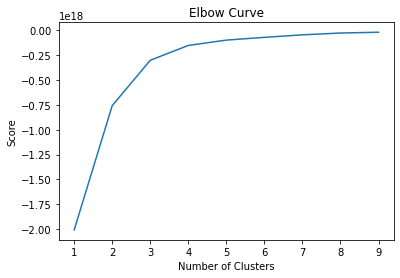

In [29]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Q5 k-means clustering

In [44]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4)

#  there's a large jump from two to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is 4.

In [45]:
# Fit the k-means object to the data.

kmeans.fit(df_subset)

KMeans(n_clusters=4)

In [46]:
df_subset['clusters'] = kmeans.fit_predict(df_subset)

C:\Users\natta\AppData\Local\Temp\ipykernel_18480\2632181828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['clusters'] = kmeans.fit_predict(df_subset)


In [47]:
df_subset.head()

,CBSA Code,AQI,Number of Sites Reporting,latitude,longitude,population,density,clusters
0,10140,21,2,46.9757,-123.8094,16571,588,0
1,10140,12,2,46.9757,-123.8094,16571,588,0
2,10140,18,2,46.9757,-123.8094,16571,588,0
3,10140,19,2,46.9757,-123.8094,16571,588,0
4,10140,17,2,46.9757,-123.8094,16571,588,0


In [48]:
df_subset['clusters'].value_counts()

0    954415
1     68866
3     20789
2      4505
Name: clusters, dtype: int64

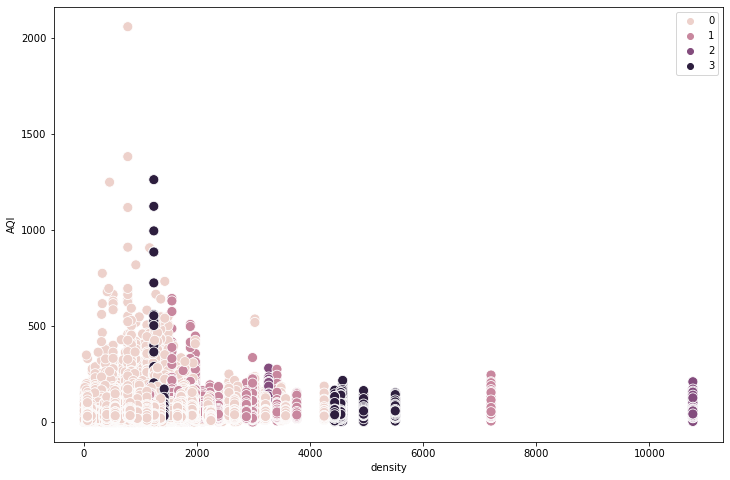

In [65]:
# Plot the clusters for the "density" and "AQI" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['density'], y=df_subset['AQI'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('density') # Label x-axis.
plt.ylabel('AQI') # Label y-axis.
plt.show()

#  as my hypothesis, this cluster shows also AQI is independate variable to density of states

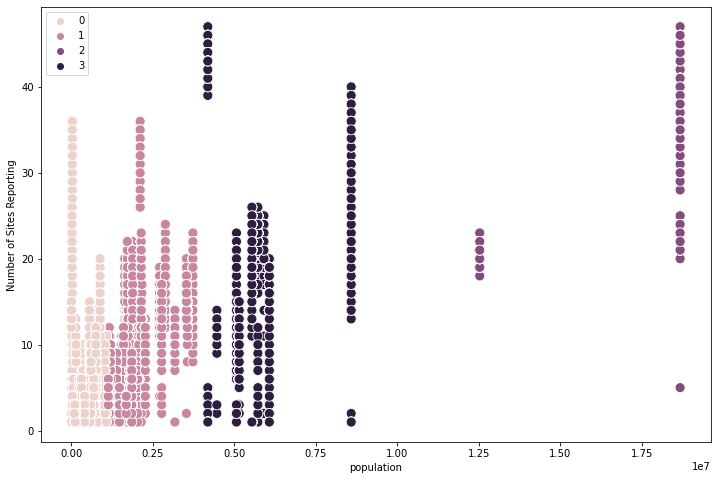

In [64]:
# Plot the clusters for the population and Number of Sites Reporting variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['population'], y=df_subset['Number of Sites Reporting'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('population') 
plt.ylabel('Number of Sites Reporting') 
plt.show()

# This cluster shows no sense. I need to check more further to find any relationship. Further relationships may have been with other variables.

In [55]:
df_subset.loc[df_subset['clusters'] == 3, 'cluster'] = 'Black'
df_subset.loc[df_subset['clusters'] == 2, 'cluster'] = 'Dark Pink'
df_subset.loc[df_subset['clusters'] == 1, 'cluster'] = 'Pink'
df_subset.loc[df_subset['clusters'] == 0, 'cluster'] = 'Light pink'

# Q9 Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [56]:
df_subset.groupby('cluster').agg({'density':['mean', 'median'], 
                         'population':['mean', 'median'], 
                         'AQI':['mean', 'median'],
                          'Number of Sites Reporting':['mean', 'median']})

density             population                    AQI         \
                   mean   median          mean      median       mean median   
cluster                                                                        
Black       3241.915003   4434.0  5.622663e+06   5540199.0  59.252008   51.0   
Dark Pink   7118.234850  10768.0  1.568825e+07  18680025.0  72.128524   61.0   
Light pink   862.586450    726.0  1.673155e+05     85086.0  39.734861   38.0   
Pink        1947.845424   1754.0  2.063230e+06   1797166.0  53.662736   48.0   

           Number of Sites Reporting         
                                mean median  
cluster                                      
Black                      21.017654   20.0  
Dark Pink                  29.558491   23.0  
Light pink                  2.327469    1.0  
Pink                       11.276944   10.0